# Evaluation Project 4: Global Power Plant Database

Description: 

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC 
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score,mean_squared_error, mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("powerplant.csv")

# Understanding the dataset: 

In [3]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


We do have 907 rows and 27 columns in the complete dataset.

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

We have two target variables - Capacity_mw and primary fuel and rest of the variables are independent and features to the target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observation: 
        
       In terms of data types we have with respect to the variables - certain object type variables do exsist in the dataset as well. There are ample of null values avilable in the dataset.

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Note: 

    Considering the data type variables have and level of significance it has with the target variables - we can fill the null values of drop them as well. However in order to decide whether to drop or fill them, we need to know how well do they correlate with target variables.

In [7]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [8]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [9]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [10]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [11]:
print(df['other_fuel1'].mode())
print('The maximum number of fuel used in power plant is', df['other_fuel1'].mode(),".")

0    Oil
dtype: object
The maximum number of fuel used in power plant is 0    Oil
dtype: object .


Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

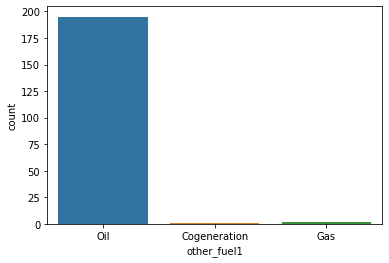

In [12]:
print(df['other_fuel1'].value_counts())
sns.countplot(df['other_fuel1'])

# Removing the missing values with fillna method with mean as per primary fuel or dropping it.

In [13]:
df.drop(['estimated_generation_gwh','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019'], axis=1, inplace= True)

In [14]:
df.drop(['commissioning_year'], axis=1, inplace= True)

In [27]:
df.drop(df[df['primary_fuel']=='Solar'].index, inplace = True)
df.drop(df[df['primary_fuel']=='Wind'].index, inplace = True)
df.drop(df[df['primary_fuel']=='Biomass'].index, inplace = True)

In [28]:
df.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Coal       4737.279310
Gas        2379.789847
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Name: generation_gwh_2014, dtype: float64

In [29]:
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2014'].fillna(4737.279310),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2014'].fillna(7756.601441),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2014'].fillna(780.429852),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2014'].fillna(4867.556164),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2014'].fillna(130.881366),df['generation_gwh_2014']  )

In [30]:
df.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Name: generation_gwh_2015, dtype: float64

In [31]:
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2015'].fillna(4649.585751),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2015'].fillna(840.159648),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2015'].fillna(709.991238),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2015'].fillna(4234.875000),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2015'].fillna(21.710086),df['generation_gwh_2015']  )

In [32]:
df.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Name: generation_gwh_2016, dtype: float64

In [33]:
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2016'].fillna(4761.233946),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2016'].fillna(826.305503),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2016'].fillna(699.318079),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2016'].fillna(4272.608750),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2016'].fillna(4.796871),df['generation_gwh_2016']  )

In [34]:
df.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Name: generation_gwh_2017, dtype: float64

In [35]:
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2017'].fillna(4870.537285),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2017'].fillna(881.216187),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2017'].fillna(693.884741),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2017'].fillna(4323.415000),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2017'].fillna(0.167471),df['generation_gwh_2017']  )

In [36]:
df.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Name: generation_gwh_2018, dtype: float64

In [37]:
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2018'].fillna(5036.420635),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2018'].fillna(846.658418),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2018'].fillna(737.636455),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2018'].fillna(4277.031250),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2018'].fillna(0.295215),df['generation_gwh_2018']  )

In [38]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   27
longitude                  27
primary_fuel                0
other_fuel1               409
other_fuel2               606
owner                     520
source                      0
url                         0
geolocation_source          0
year_of_capacity_data      88
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    158
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 1 to 905
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 607 non-null    object 
 1   country_long            607 non-null    object 
 2   name                    607 non-null    object 
 3   gppd_idnr               607 non-null    object 
 4   capacity_mw             607 non-null    float64
 5   latitude                580 non-null    float64
 6   longitude               580 non-null    float64
 7   primary_fuel            607 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   other_fuel2             1 non-null      object 
 10  owner                   87 non-null     object 
 11  source                  607 non-null    object 
 12  url                     607 non-null    object 
 13  geolocation_source      607 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

All null values are filled or removed from the dataset with the fesable manner. No missing value exsist in the dataset now!

In [41]:
df['name'].unique()

array(['ADITYA CEMENT WORKS', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'BADARPUR', 'BAGLIHAR HEP',
       'BAGLIHAR HEP-II', 'BAIRA SIUL', 'BAKRESWAR', 'BALCO TPP',
       'BALIMELA', 'BALLARPUR BILT POWER', 'BAMANIA CEMENT',
       'BANDAKHAR TPP', 'BANDEL', 'BANER', 'BANSAGAR (I)',
       'BANSAGAR (II)', 'BANSAGAR (III)', 'BANSAGAR (IV)',
       'BANSWARA CEMENT', 'BARADARHA TPP', 'BARAMURA', 'BARAUNI', 'BARGI',
       'BARH STPP II', 'BARKHERA TPP', 'BARSINGAR LIGNITE',
       'BASIN BRIDGE GT', 'BASPA', 'BASSI', 'BELA NAGPUR', 'BELLARY DG',
       'BELLARY HOTHUR', 'BELLARY JANKI', 'BELLARY TPS', 'BHADRA',
       'BHADRAVATI MILL', 'BHAKRA', 'BHANDARA STEEL MILL', 'BHANDARDHARA',
       'BH

In [42]:
df['primary_fuel'].unique()

array(['Coal', 'Gas', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

In [43]:
df['country'].unique()

array(['IND'], dtype=object)

In [44]:
df['country_long'].unique()

array(['India'], dtype=object)

We can drop certain variables since they are sort of irrelevant to the target variable.

In [45]:
df.drop(['name','country','country_long','other_fuel1','other_fuel2'], axis=1, inplace= True)

In [46]:
df.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [47]:
df.drop(['gppd_idnr','url'], axis=1,inplace=True)

In [48]:
df.drop(['owner','source','generation_data_source','geolocation_source'], axis=1,inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 1 to 905
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            607 non-null    float64
 1   latitude               580 non-null    float64
 2   longitude              580 non-null    float64
 3   primary_fuel           607 non-null    object 
 4   year_of_capacity_data  519 non-null    float64
 5   generation_gwh_2014    607 non-null    float64
 6   generation_gwh_2015    607 non-null    float64
 7   generation_gwh_2016    607 non-null    float64
 8   generation_gwh_2017    607 non-null    float64
 9   generation_gwh_2018    607 non-null    float64
dtypes: float64(9), object(1)
memory usage: 52.2+ KB


In [50]:
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

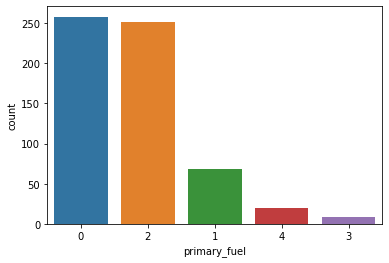

In [52]:
### Understanding the primary fuel variable 
sns.countplot(df['primary_fuel'],order=df['primary_fuel'].value_counts().index)

We do have 8 type of primary fuels: 
        
        1. 1: coal 
        2. 2: Gas fuel 
        3. 3: Hydro 
        4. 4: Nuclear 
        5. 5: Oil 
        6. 6: Solar 
        7. 7: Wind 
        8: 0: Biomass

We will be predicting the category of primary fuel employed in power plant from among mentioned category.

Now the data is inbalanced generally with massive difference; we need to treat it.

count     607.000000
mean      474.484903
std       672.992349
min         3.300000
25%        43.500000
50%       166.500000
75%       607.500000
max      4760.000000
Name: capacity_mw, dtype: float64


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

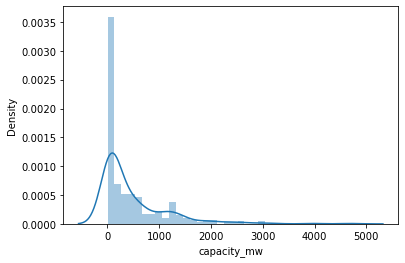

In [53]:
### Understanding the feature variables now 
print(df['capacity_mw'].describe())
sns.distplot(df['capacity_mw'])

In [54]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,607.0,474.484903,672.992349,3.3000,43.500000,166.500000,607.500000,4760.000
latitude,580.0,21.527712,6.377967,8.1689,17.102625,22.040550,25.239100,34.649
longitude,580.0,78.890325,5.000145,68.6447,75.667675,77.713400,81.327875,95.408
primary_fuel,607.0,1.116969,1.087504,0.0000,0.000000,1.000000,2.000000,4.000
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2014,607.0,2683.257145,3554.947011,0.0000,401.766075,1014.800000,4737.279310,28127.000
generation_gwh_2015,607.0,2428.863290,3663.645764,0.0000,318.111450,748.628050,4644.077875,30539.000
generation_gwh_2016,607.0,2470.332276,3684.919245,0.0000,289.480900,739.155400,4653.229750,30015.000
generation_gwh_2017,607.0,2521.386641,3739.956163,0.0000,277.222775,829.611100,4660.836000,35116.000
generation_gwh_2018,607.0,2605.373790,3868.965829,0.0000,286.819800,815.984131,4877.478500,35136.000


Observations: 
    
    1. There is a imbalanced data available in terms of number of rows each variables have. It is not equal. 
    2. Considering the value of standard deviation, each variable holds - there are outliers and skewness present in the dataset. 
    3. The data is not bell shaped, it is not normally distributed.

In [58]:
### Considering the capacity in terms of primary fuels category. 
group = df.groupby('primary_fuel')['capacity_mw'].mean().reset_index()
group

,primary_fuel,capacity_mw
0,0,797.826434
1,1,364.818928
2,2,185.026972
3,3,975.555556
4,4,88.942000


Observations: 
    
    1. Maximum capacity is with Nuclear power fuel. 
    2. Minium capacity is with biomass fuel.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

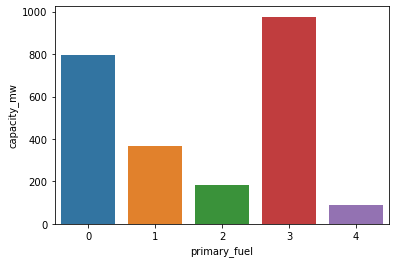

In [59]:
### Depicting the same observation with the barplot now.
sns.barplot(group['primary_fuel'], group['capacity_mw'])

<AxesSubplot:xlabel='year_of_capacity_data'>

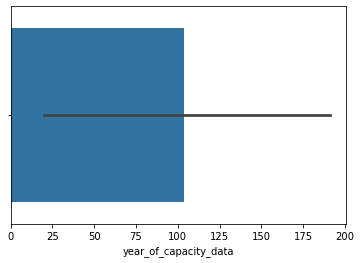

In [60]:
## Cosidering the primary fuel categories with year_of_capacity_data.
df.groupby('primary_fuel')['year_of_capacity_data'].count()
sns.barplot(df.groupby('primary_fuel')['year_of_capacity_data'].count())

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

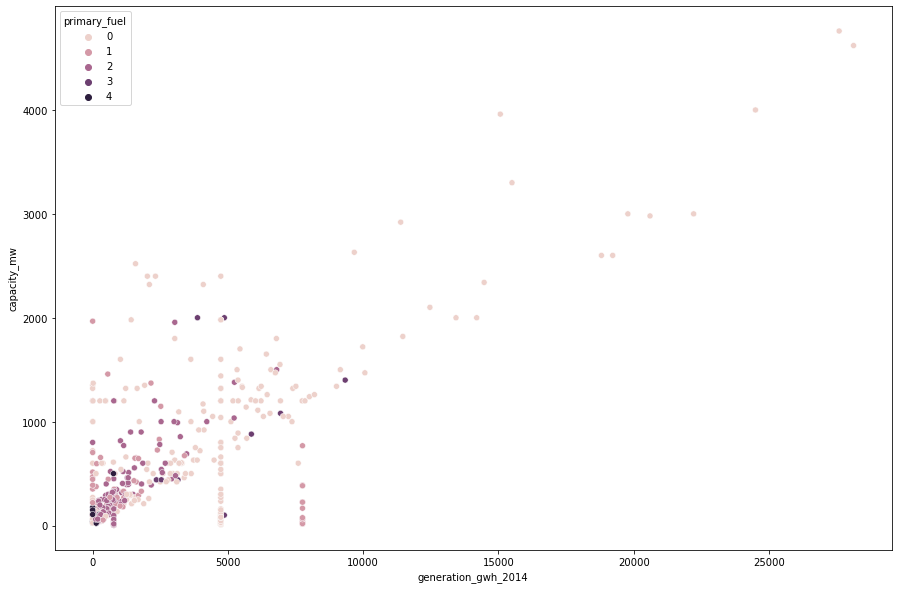

In [61]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',hue='primary_fuel', data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

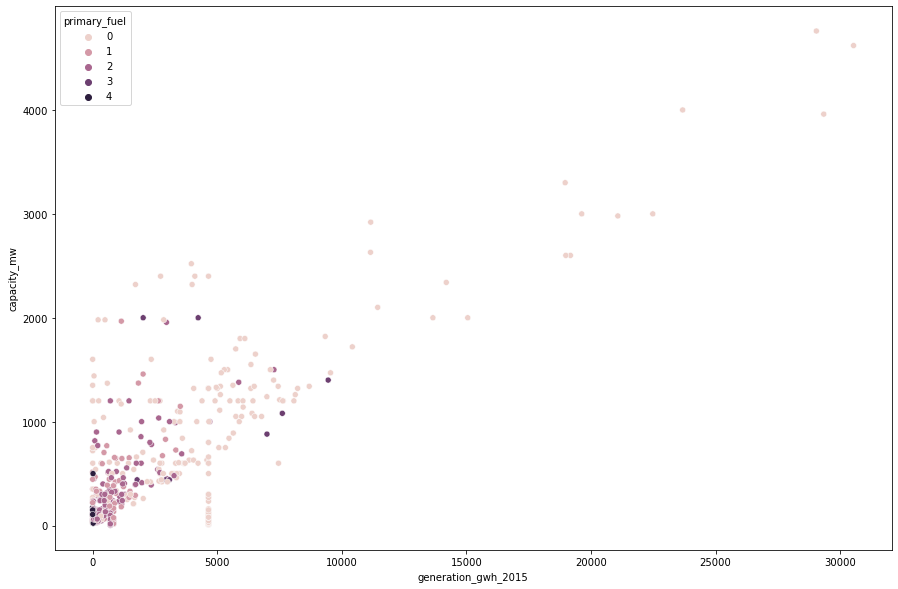

In [62]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',hue='primary_fuel', data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

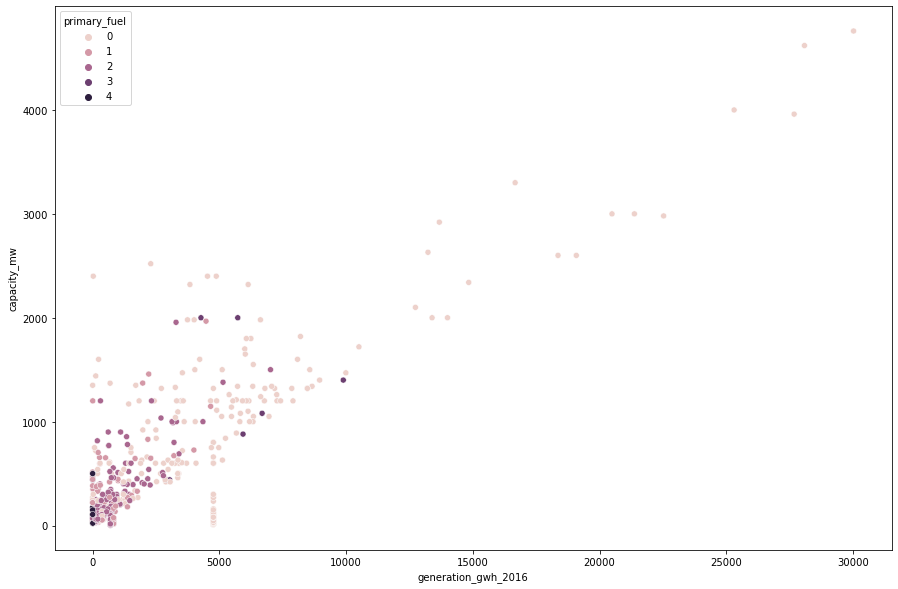

In [63]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',hue='primary_fuel', data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

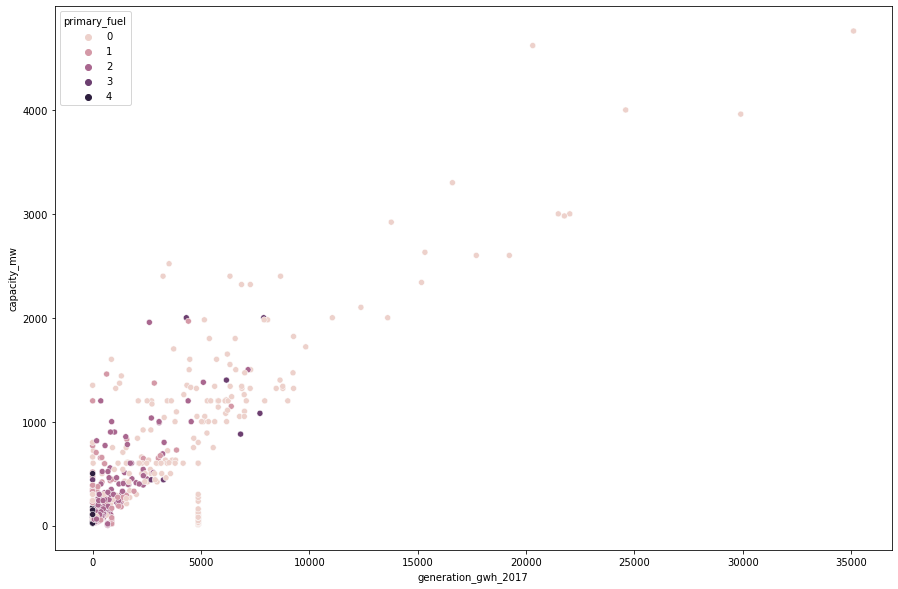

In [64]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel', data=df)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

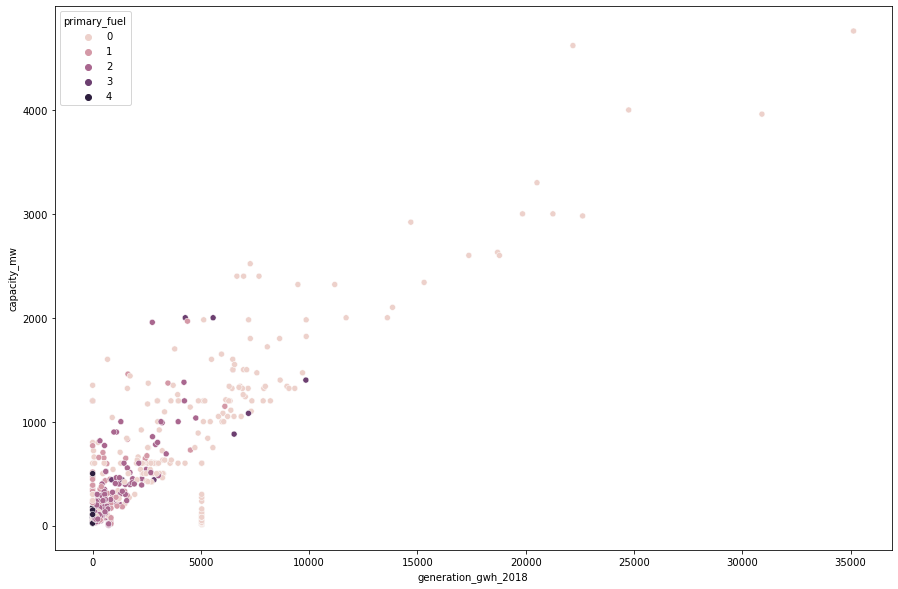

In [65]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',hue='primary_fuel', data=df)

Observations from the above consecutive scatter plot: 
    
    1. Biomass , Solar , Wind generated gwh not available for the following 2014,2015,2016,2017,and 2018 year.
    2. Coal power fuel do follow the linear growth as years are increasing. 
    3. Rest of the fuel type do not follow the linear growth, it is scattered.

In [66]:
### Checking the correlation among the variables 
df.corr().T

,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.034036,0.060210,-0.383724,NaN,0.688570,0.745858,0.773537,0.788500,0.801337
latitude,0.034036,1.000000,0.150689,-0.035135,NaN,0.042253,0.045460,0.042498,0.052836,0.046546
longitude,0.060210,0.150689,1.000000,-0.129593,NaN,-0.021346,0.010687,0.035479,0.041201,0.038701
primary_fuel,-0.383724,-0.035135,-0.129593,1.000000,NaN,-0.478645,-0.462344,-0.473990,-0.480222,-0.479351
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.688570,0.042253,-0.021346,-0.478645,NaN,1.000000,0.897313,0.875931,0.850252,0.841277
generation_gwh_2015,0.745858,0.045460,0.010687,-0.462344,NaN,0.897313,1.000000,0.971335,0.932508,0.926584
generation_gwh_2016,0.773537,0.042498,0.035479,-0.473990,NaN,0.875931,0.971335,1.000000,0.965492,0.955782
generation_gwh_2017,0.788500,0.052836,0.041201,-0.480222,NaN,0.850252,0.932508,0.965492,1.000000,0.985594
generation_gwh_2018,0.801337,0.046546,0.038701,-0.479351,NaN,0.841277,0.926584,0.955782,0.985594,1.000000


<AxesSubplot:>

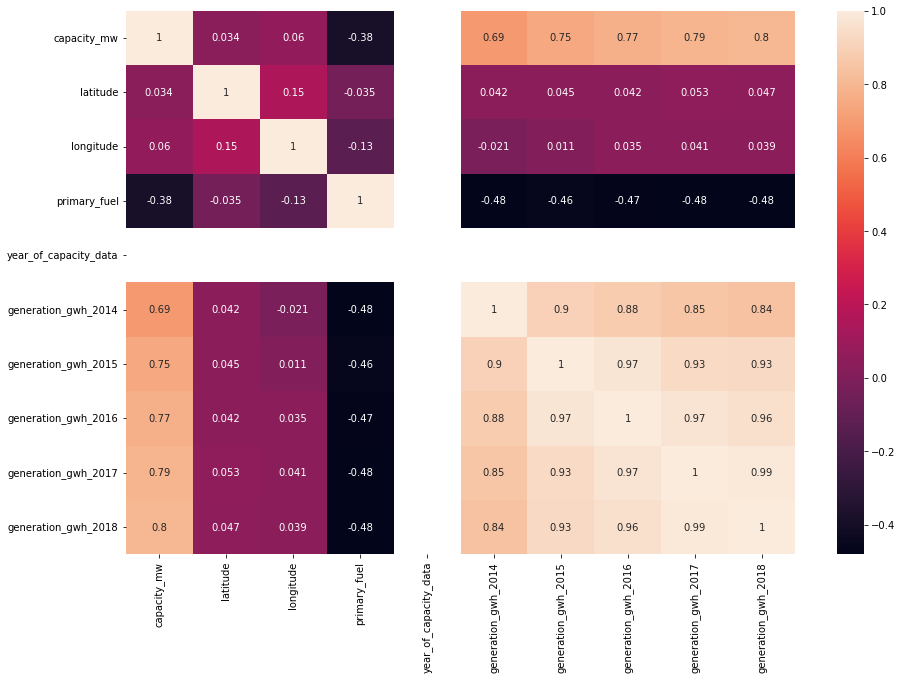

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Observations: 
    
    1. All the varaibles are almost neagtively correlated with our target variable "primary fuel".
    2. The variable "generation_gwh_2018" do hold the highly significant positive correlation with target variable "capacity_mw".

<Figure size 2160x1080 with 0 Axes>

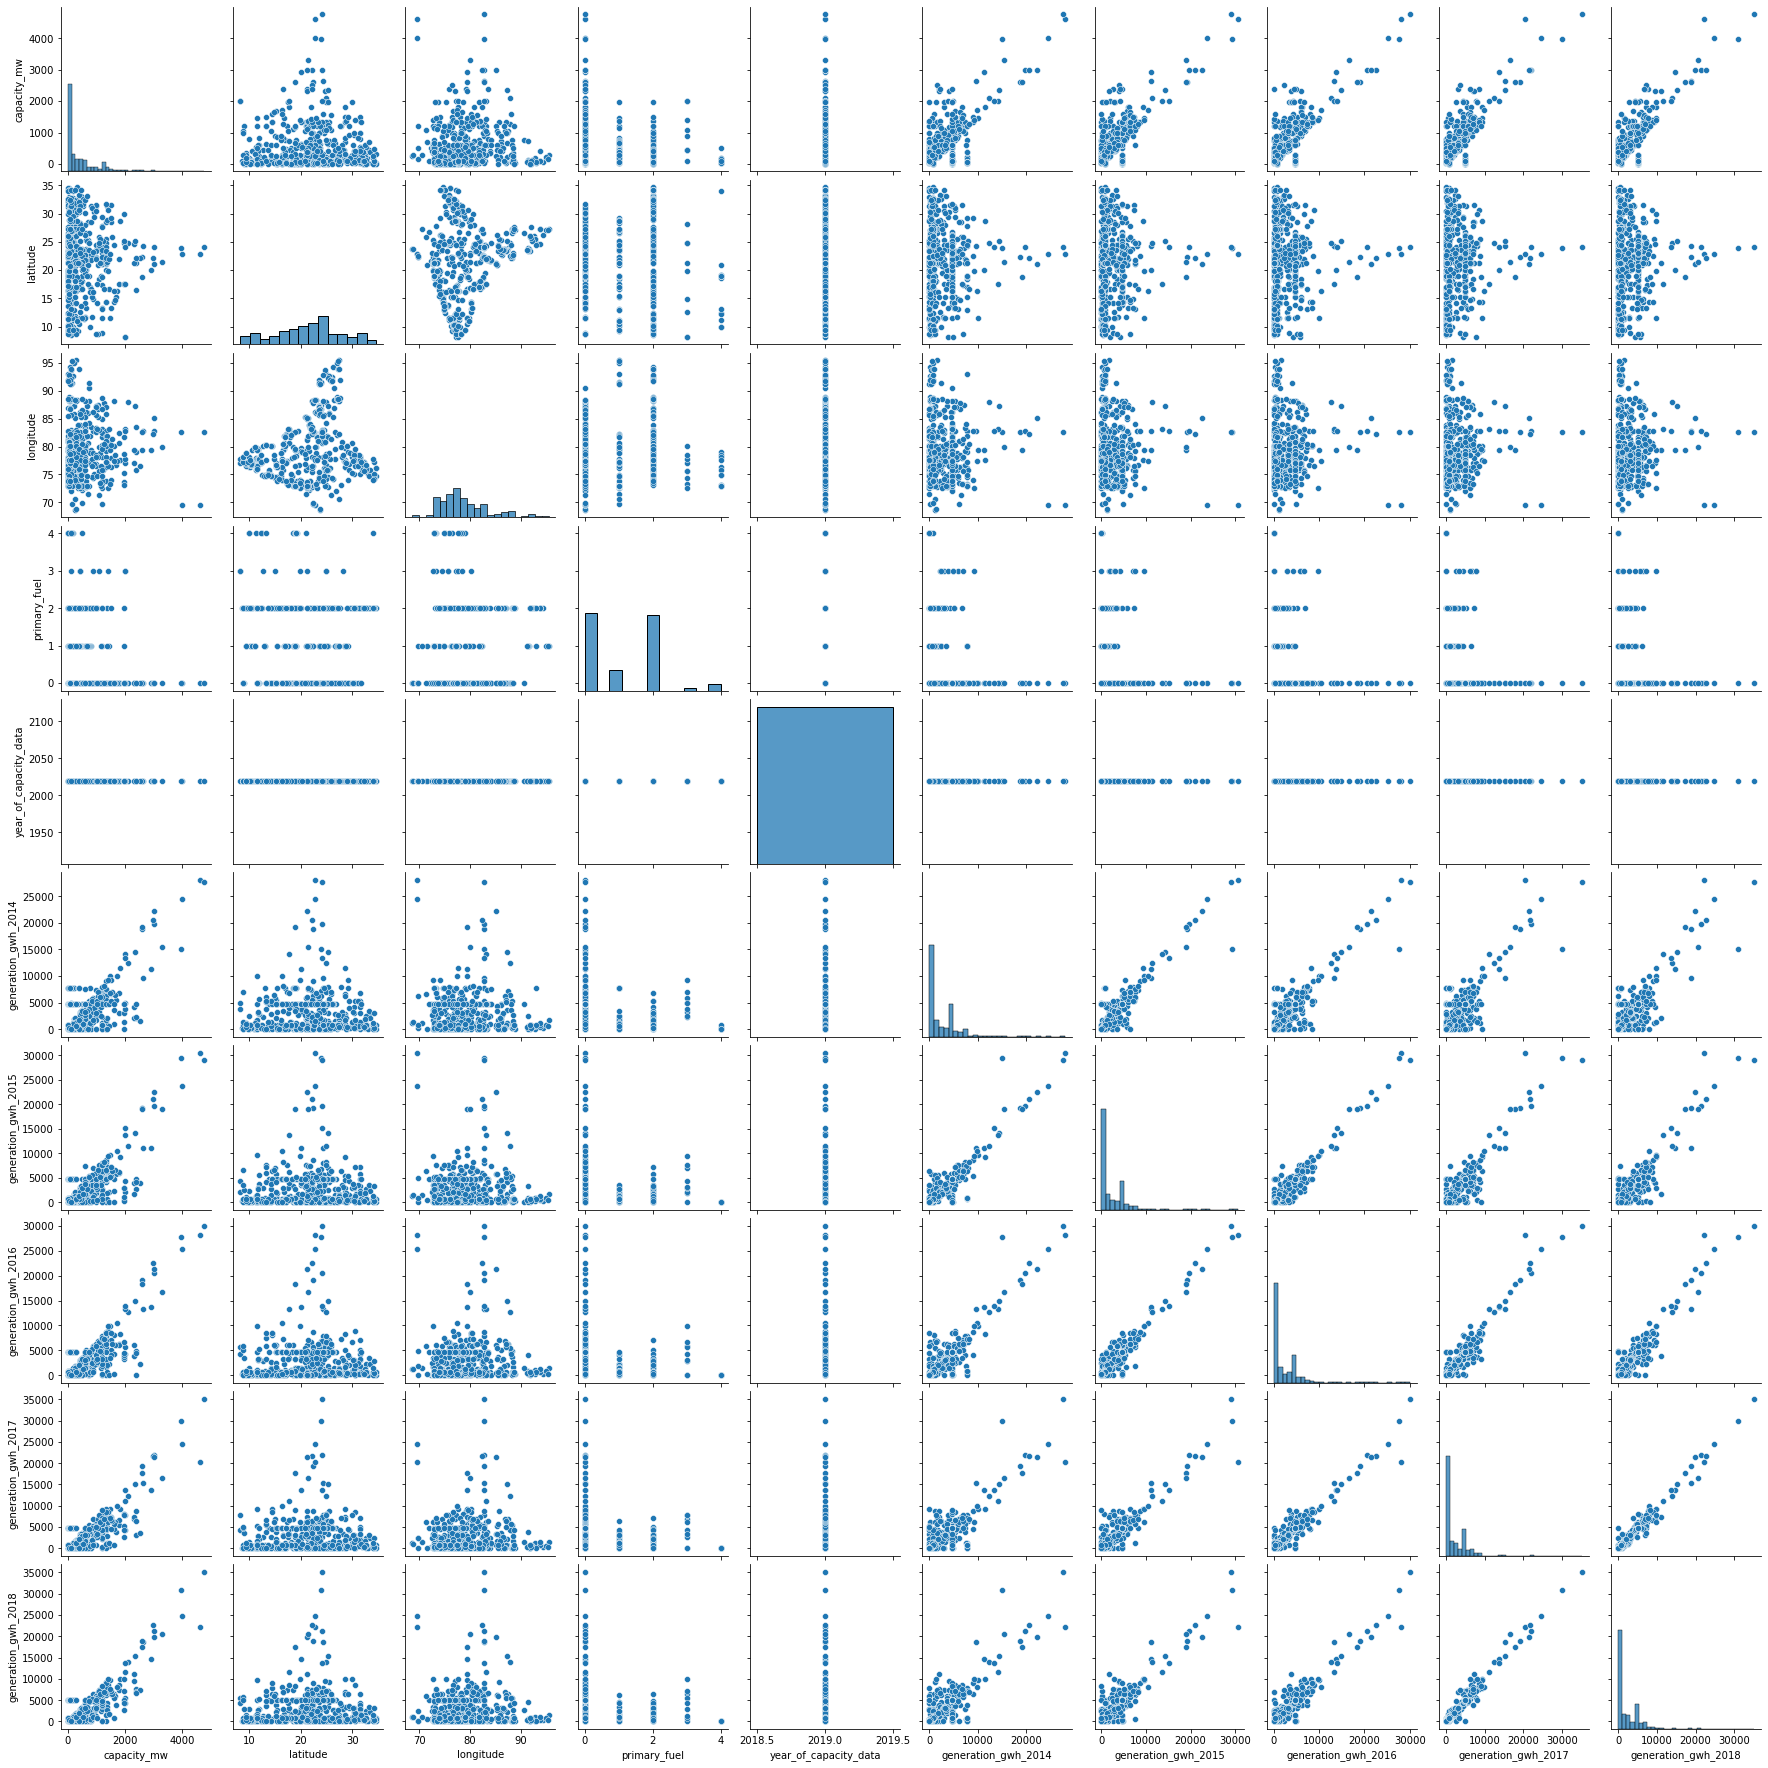

In [68]:
plt.figure(figsize=(30,15))
sns.pairplot(df)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

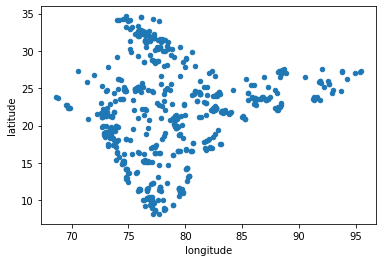

In [69]:
### Understanding the longitude and latitude altogether 
df.plot(x="longitude", y="latitude", kind="scatter",colormap="YlOrRd")

Observation: 
    
    These are not linearly distributed, it is scattered and don't follow a linear normal distrubution.

In [70]:
df.skew()

capacity_mw              2.523310
latitude                -0.108396
longitude                1.030020
primary_fuel             0.453807
year_of_capacity_data    0.000000
generation_gwh_2014      3.078832
generation_gwh_2015      3.826520
generation_gwh_2016      3.622211
generation_gwh_2017      3.673231
generation_gwh_2018      3.559440
dtype: float64

<AxesSubplot:ylabel='Density'>

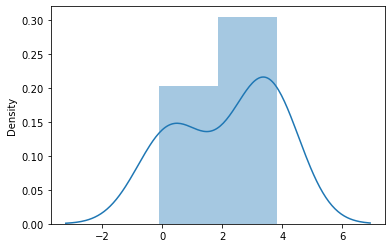

In [71]:
sns.distplot(df.skew())

Data is not normally distributed, it is skewed. 

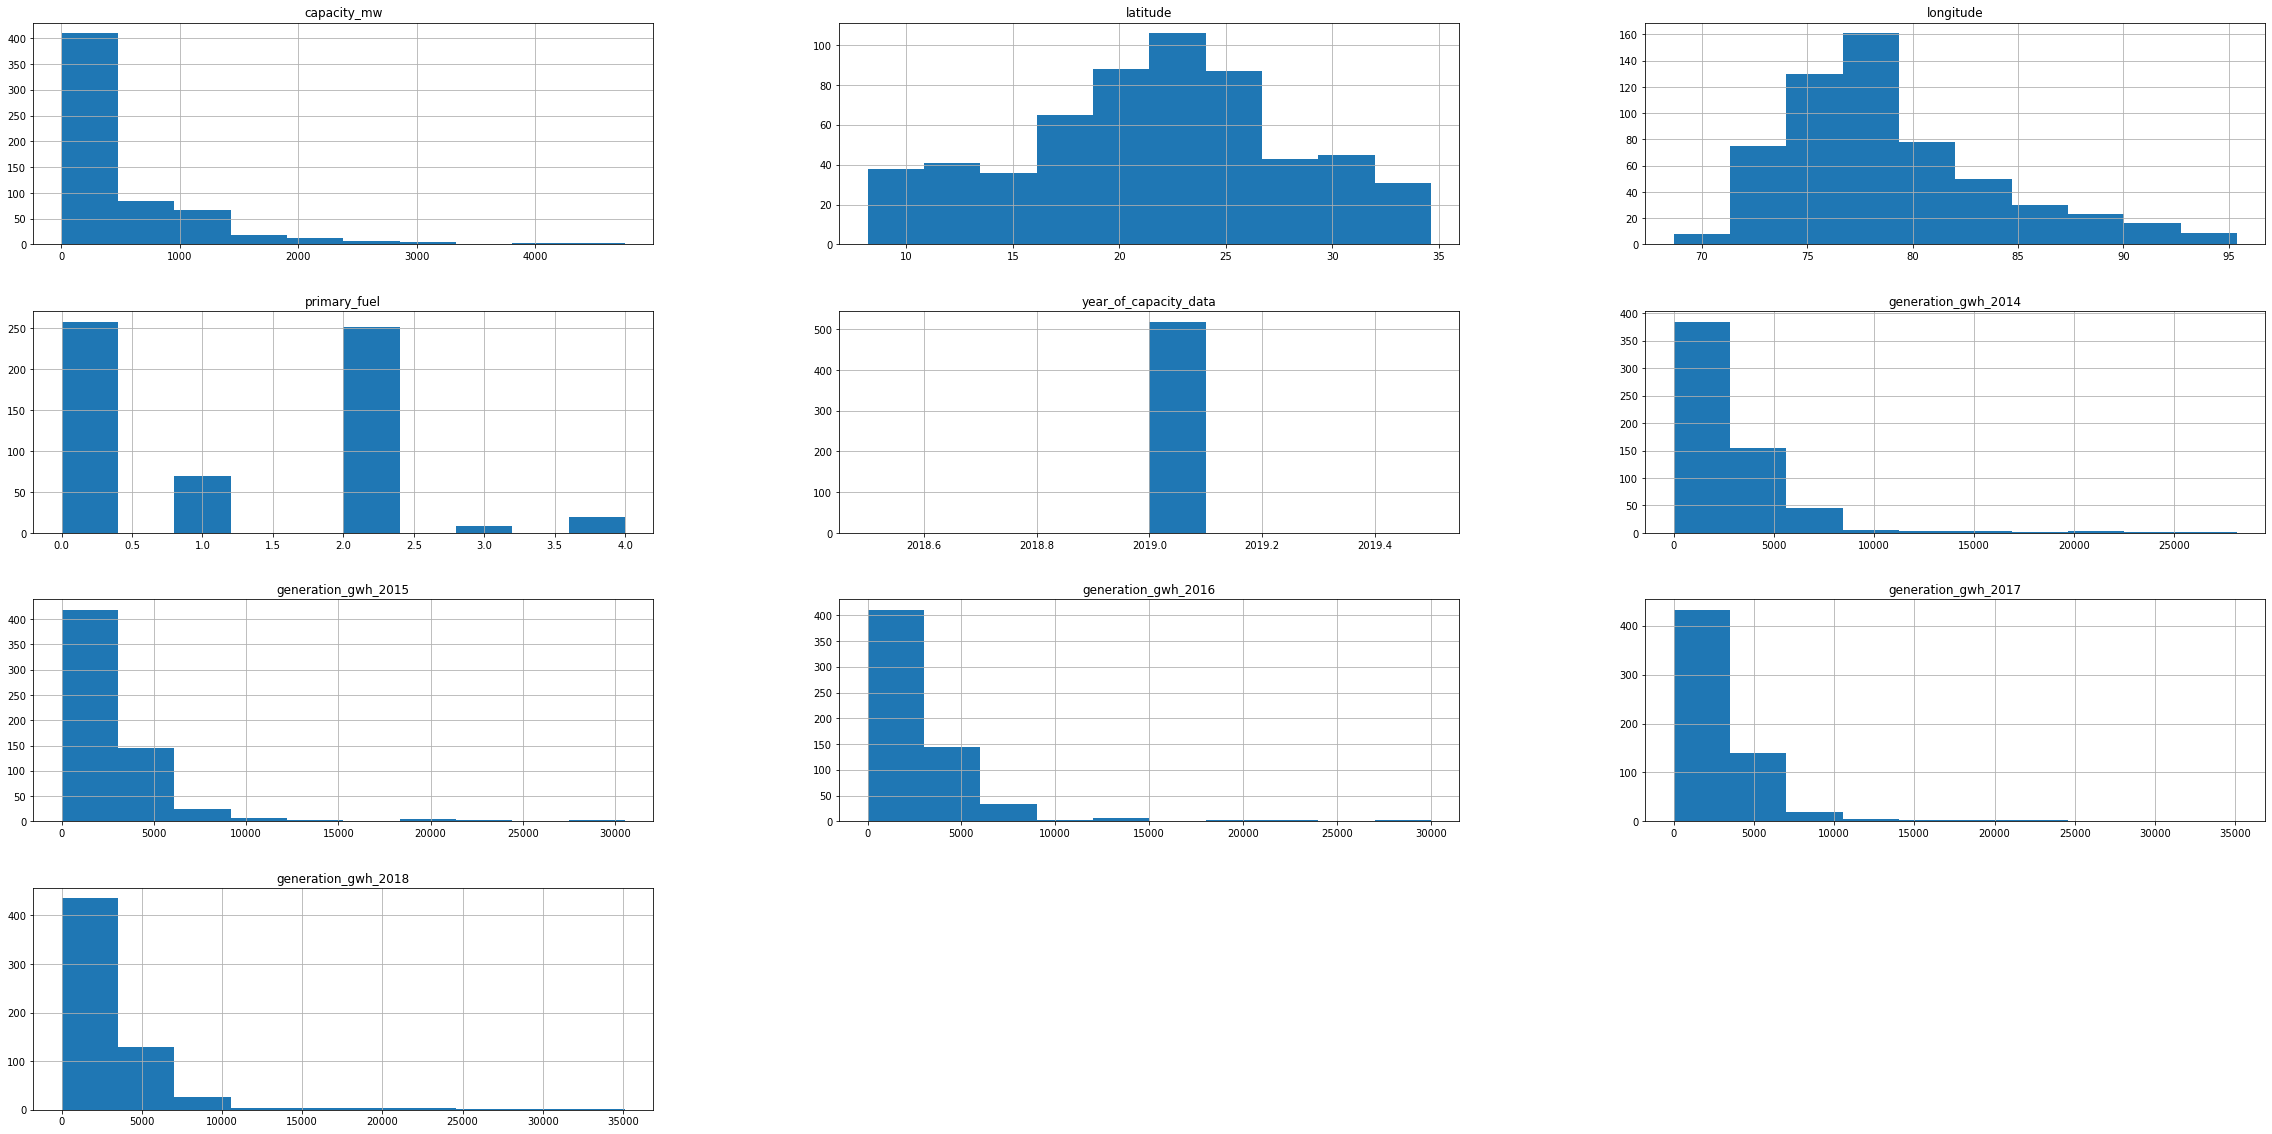

In [72]:
## Checking out the distribution with respect to each feature variables. 
df.hist(figsize=(40,20))
plt.show()

# Task: 1 Predicting the primary fuel

In [73]:
X= df.drop('primary_fuel', axis=1)
Y= df['primary_fuel']

In [74]:
print(X.shape) 
print(Y.shape)

(607, 9)
(607,)


In [75]:
X.head()

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,98.0,24.7663,74.6090,NaN,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
3,135.0,23.8712,91.3602,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150


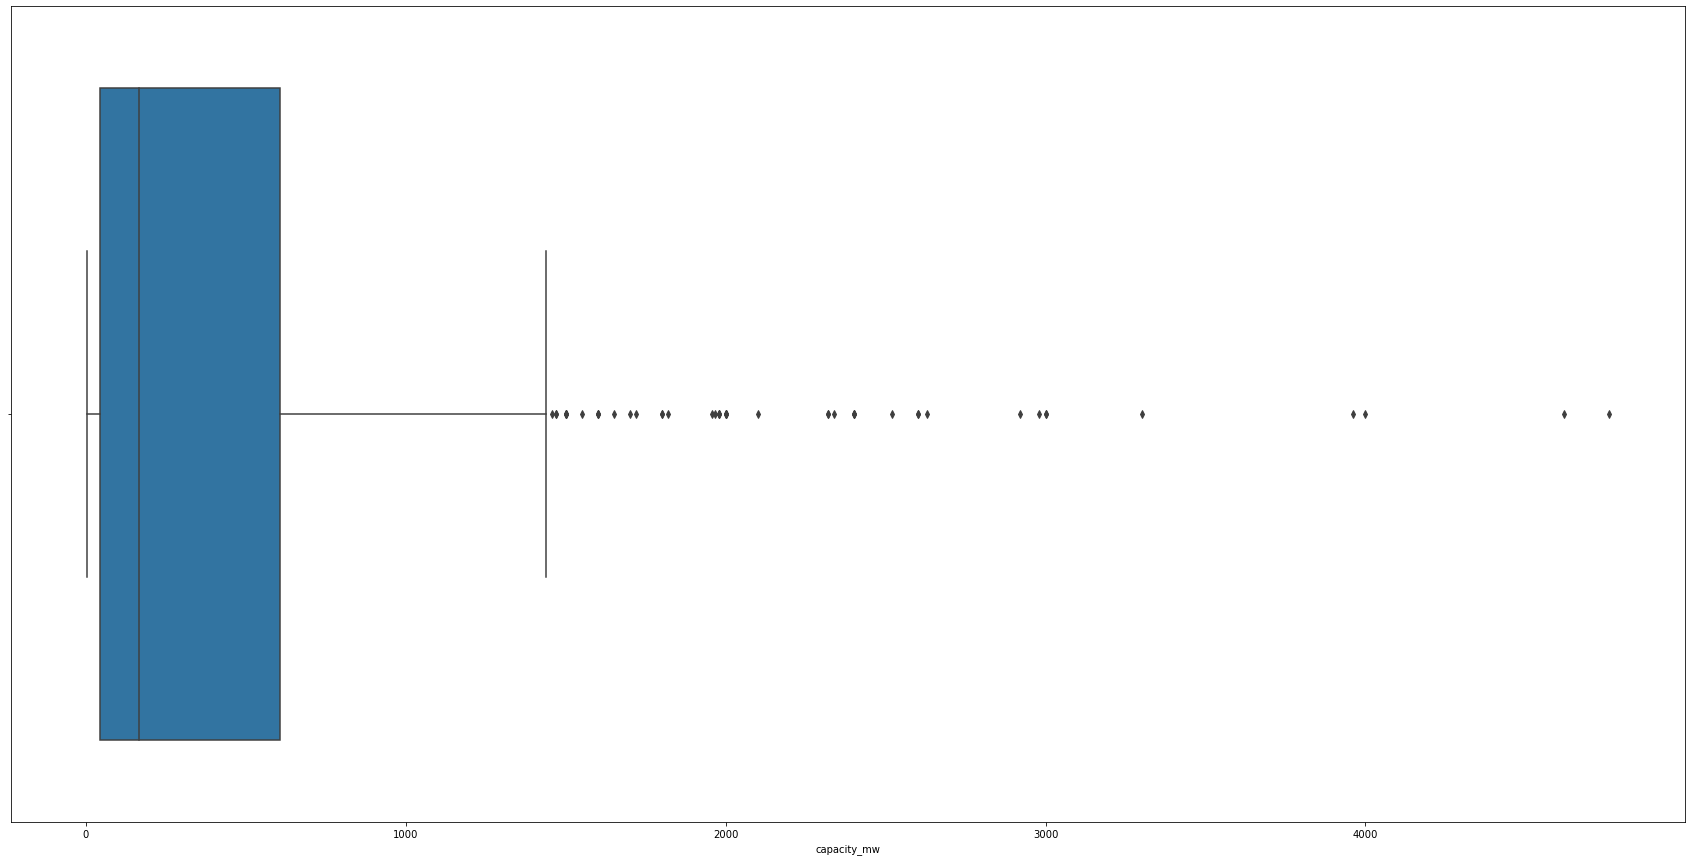

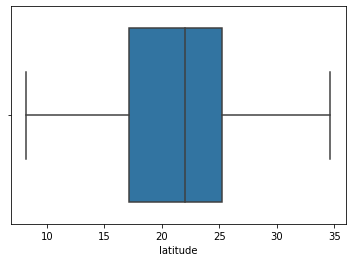

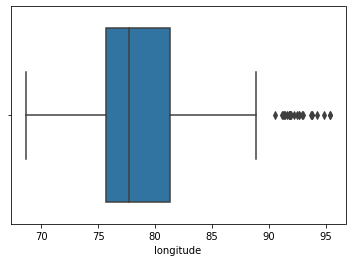

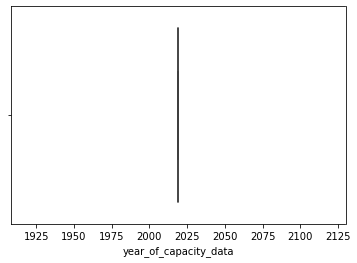

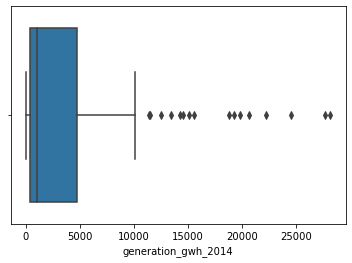

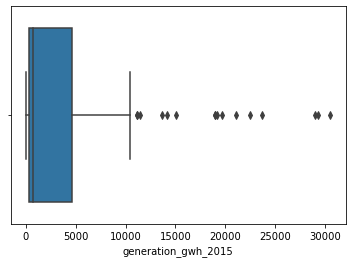

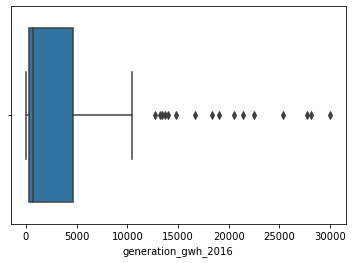

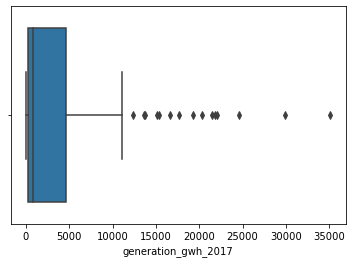

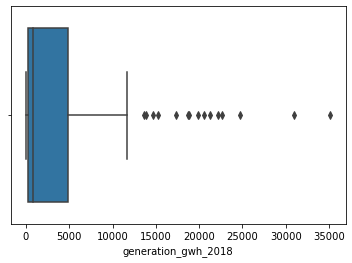

In [76]:
### Looking at the outliers available in the X data 
plt.figure(figsize=(30,15))
for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

Outleirs are heavily avialbale, treating them simultenously.

In [77]:
col=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for i in col:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    upper= (X[i].quantile(.75) +(1.5* IQR))
    X[i]=np.where(X[i]>upper,upper,X[i])

In [78]:
## Checking at the skewness as well. 
X.skew()

capacity_mw              1.109633
latitude                -0.108396
longitude                1.030020
year_of_capacity_data    0.000000
generation_gwh_2014      1.282673
generation_gwh_2015      1.518384
generation_gwh_2016      1.476022
generation_gwh_2017      1.409096
generation_gwh_2018      1.454508
dtype: float64

<AxesSubplot:ylabel='Density'>

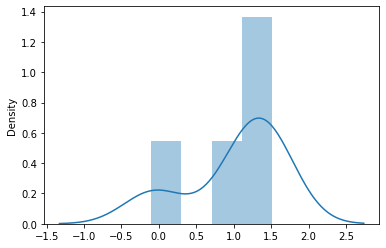

In [79]:
sns.distplot(X.skew())

All the outliers and skewness is removed from the X data distribution; data is goof to go now!

In [80]:
X

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,98.0,24.7663,74.6090,NaN,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
3,135.0,23.8712,91.3602,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1453.5,21.9603,82.4091,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,2019.0,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,2019.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,2019.0,0.000000,0.000000,0.000000,0.167471,0.000000
902,1453.5,16.2949,77.3568,2019.0,4737.279310,0.994875,233.596650,865.400000,686.500000


In [81]:
X.drop(['year_of_capacity_data'], axis=1, inplace= True)

In [100]:
### Balancing the Data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [101]:
## Splitting the data
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=74,test_size=.20)

In [102]:
from sklearn.linear_model import RidgeClassifier,SGDClassifier, LogisticRegression
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier

In [103]:
LR= LogisticRegression()
RD= RidgeClassifier()
DT= DecisionTreeClassifier()
SV= SVC()
KNR= KNeighborsClassifier()
RFR= RandomForestClassifier()
SGH= SGDClassifier()
Bag=BaggingClassifier()
ADA=AdaBoostClassifier()
GB = GradientBoostingClassifier()
model=[LR,RD,DT,SV,KNR,RFR,SGH,Bag,ADA,GB]

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 65.11627906976744
Confusion Matrix of  LogisticRegression()  is 
 [[27  3  3 25  1]
 [ 1 16 26  2  4]
 [ 1  3 32  0  0]
 [11 10  0 32  0]
 [ 0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        59
           1       0.50      0.33      0.40        49
           2       0.52      0.89      0.66        36
           3       0.54      0.60      0.57        53
           4       0.92      1.00      0.96        61

    accuracy                           0.65       258
   macro avg       0.63      0.66      0.63       258
weighted avg       0.65      0.65      0.64       258

**************************************************
Accuracy_Score of  RidgeClassifier() is 57.751937984496124
Confusion Matrix of  RidgeClassifier()  is 
 [[32  6  7 14  0]
 [ 0 14 18  2 15]
 [ 1  1 20  0 14]
 [ 7 10  4 32  0]
 [ 0  0 10  0 51]]
              precision    recall  f1-score   support

          

The highest accuracy score we have is of  GradientBoostingClassifier() with value 93.7984496124031.

In [106]:
## Performing the cross validation. 
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 65.11627906976744
cross Validation accuracy score of  LogisticRegression()  is  67.5968992248062
**************************************************
Accuracy_Score of  RidgeClassifier() is 57.751937984496124
cross Validation accuracy score of  RidgeClassifier()  is  57.751937984496124
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 88.37209302325581
cross Validation accuracy score of  DecisionTreeClassifier()  is  86.2015503875969
**************************************************
Accuracy_Score of  SVC() is 73.25581395348837
cross Validation accuracy score of  SVC()  is  69.06976744186046
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 83.33333333333334
cross Validation accuracy score of  KNeighborsClassifier()  is  83.4108527131783
**************************************************
Accuracy_Score of  RandomForestClassifier() is 90.69767441860465


As per the cross validation, RandomForestClassifier is performing well with cross validation value 91%.

In [108]:
## Performing the hyperparameter tuning. 
from sklearn.model_selection import RandomizedSearchCV
bootstrap = [True, False]
random_grid = {'n_estimators': [20,40,60,80,100],
               'criterion':['gini','entropy'],
               'max_features': ['auto','sqrt','log2'],
               'min_samples_split': [2,5,10],
              'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=42, verbose=2)

In [109]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='auto', n_estimators=80)

In [110]:
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'max_features': 'auto',
 'criterion': 'entropy',
 'bootstrap': False}

In [112]:
rf_predict=rf_random.best_estimator_.predict(x_test)

In [113]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        59
           1       0.87      0.92      0.89        49
           2       0.91      0.89      0.90        36
           3       0.96      1.00      0.98        53
           4       1.00      1.00      1.00        61

    accuracy                           0.93       258
   macro avg       0.93      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



In [114]:
confusion_matrix(y_test,rf_predict)

array([[50,  6,  1,  2,  0],
       [ 2, 45,  2,  0,  0],
       [ 3,  1, 32,  0,  0],
       [ 0,  0,  0, 53,  0],
       [ 0,  0,  0,  0, 61]], dtype=int64)

In [115]:
accuracy_score(y_test,rf_predict)*100

93.4108527131783

In [118]:
ypred=rf_random.predict_proba(x_test)
ypred

array([[0.    , 0.    , 0.    , 0.    , 1.    ],
       [0.0125, 0.275 , 0.7125, 0.    , 0.    ],
       [0.0125, 0.    , 0.    , 0.    , 0.9875],
       ...,
       [0.125 , 0.15  , 0.725 , 0.    , 0.    ],
       [1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.325 , 0.675 , 0.    , 0.    ]])

In [119]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
roc_auc_score(y_test,ypred,multi_class='ovr', average='weighted')

0.9944909473727063

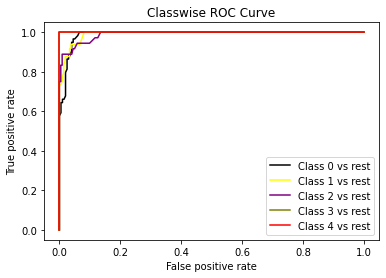

In [122]:
fpr={}
tpr={}
threshold={}

n_class=5

for i in range(n_class):
    fpr[i],tpr[i],threshold[i]=roc_curve(y_test,ypred[:,i],pos_label=i)
    
#plotting
plt.plot(fpr[0],tpr[0], color='black',label='Class 0 vs rest'  )
plt.plot(fpr[1],tpr[1], color='yellow',label='Class 1 vs rest'  )
plt.plot(fpr[2],tpr[2], color='purple',label='Class 2 vs rest'  )
plt.plot(fpr[3],tpr[3], color='olive',label='Class 3 vs rest'  )
plt.plot(fpr[4],tpr[4], color='red',label='Class 4 vs rest'  )
plt.title('Classwise ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()

# By the end, we got the ROC_AUD score by 99.4% which is really good for predicting the primary fuel categories.

In [124]:
#Saving the model
import joblib
joblib.dump(rf_random.best_estimator_,'Global_Power_PrimaryFuel_prediction.pkl')

['Global_Power_PrimaryFuel_prediction.pkl']

# Task 2: Making Precitions for Capacity 

In [125]:
df

,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,98.0,24.7663,74.6090,0,NaN,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
3,135.0,23.8712,91.3602,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,0,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,2,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,2,2019.0,184.453100,183.000000,204.253600,175.866250,236.491600
899,600.0,30.1081,77.3257,0,2019.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
901,106.6,13.1156,77.5838,4,2019.0,0.000000,0.000000,0.000000,0.167471,0.000000
902,1600.0,16.2949,77.3568,0,2019.0,4737.279310,0.994875,233.596650,865.400000,686.500000


In [127]:
df.drop(['year_of_capacity_data'], axis=1, inplace= True)
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [128]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 1 to 905
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          607 non-null    float64
 1   latitude             607 non-null    float64
 2   longitude            607 non-null    float64
 3   primary_fuel         607 non-null    int32  
 4   generation_gwh_2014  607 non-null    float64
 5   generation_gwh_2015  607 non-null    float64
 6   generation_gwh_2016  607 non-null    float64
 7   generation_gwh_2017  607 non-null    float64
 8   generation_gwh_2018  607 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 61.2 KB


Data is good to go for the training ---> 

In [131]:
x=df.drop('capacity_mw', axis=1)
y=df['capacity_mw']

In [133]:
## Performing transformation 
from sklearn.preprocessing import power_transform
transform=power_transform(x)

In [134]:
## Performing standarization 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standard=sc.fit_transform(transform)

In [135]:
standard.shape

(607, 8)

In [136]:
y.shape

(607,)

In [137]:
x_train,x_test,y_train,y_test= train_test_split(standard,y,random_state=44,test_size=.2)

In [138]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [141]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,GB_model ]

In [142]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 375.84813048469954
mean_square_error of LinearRegression() model 276408.913208706
R2 Score of LinearRegression() model 26.102793011896164
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 374.75769990547275
mean_square_error of Ridge() model 274219.1407404567
R2 Score of Ridge() model 26.688223009303258
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 373.4436071090522
mean_square_error of Lasso() model 270998.54585630796
R2 Score of Lasso() model 27.549240709550393
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 161.39341803278688
mean_square_error of DecisionTreeRegressor() model 83226.24164928037
R2 Score of DecisionTreeRegressor() model 77.74967986884329
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 373.14632124801926
mean_square_error of SVR() mod

Random Forest Classifer gave the highest R2 score - 85.6%.

In [145]:
## Performing the cross validation 
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,standard,y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 276408.913208706
cross Validation score of  LinearRegression()  is  -303786.5298057834
**************************************************
mean_square of  Ridge() model 274219.1407404567
cross Validation score of  Ridge()  is  -303579.845243232
**************************************************
mean_square of  Lasso() model 270998.54585630796
cross Validation score of  Lasso()  is  -303776.1379476629
**************************************************
mean_square of  DecisionTreeRegressor() model 83226.24164928037
cross Validation score of  DecisionTreeRegressor()  is  -106290.91640680516
**************************************************
mean_square of  SVR() model 415746.96824622084
cross Validation score of  SVR()  is  -514030.73660461174
**************************************************
mean_square of  KNeighborsRegressor() model 122881.52526072164
cross Validation score of  KNeighborsRegressor()  is  -141719.441137201
***********************

In [146]:
## Performing hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV

n_estimator= [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336, 391, 445, 500]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

random_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [147]:
randomCV =RandomizedSearchCV(RFR_model,param_distributions=random_grid,cv=5,random_state=100,verbose=2,n_jobs=-1)
randomCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [148]:
randomCV.best_estimator_

RandomForestRegressor(max_depth=445, max_features='auto', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=1400)

In [149]:
random_predict=randomCV.best_estimator_.predict(x_test)

In [150]:
print('mean_square_error of GrieSearchCV model' , mean_squared_error(y_test,random_predict))
print('R2 Score of Grid Search CV model', r2_score(y_test,random_predict )*100)

mean_square_error of GrieSearchCV model 57701.4319245222
R2 Score of Grid Search CV model 84.57367163403724


In [151]:
## Saving the model now. 
joblib.dump(randomCV.best_estimator_,'Global_Power_capacity.pkl')

['Global_Power_capacity.pkl']